In [ ]:
# Mã hoá một chiều
- Công cụ: `Sha1` online, `Md5` online
- Sử dụng: Cho một chuỗi đầu vào -> sinh ra chuỗi đầu ra
VD:

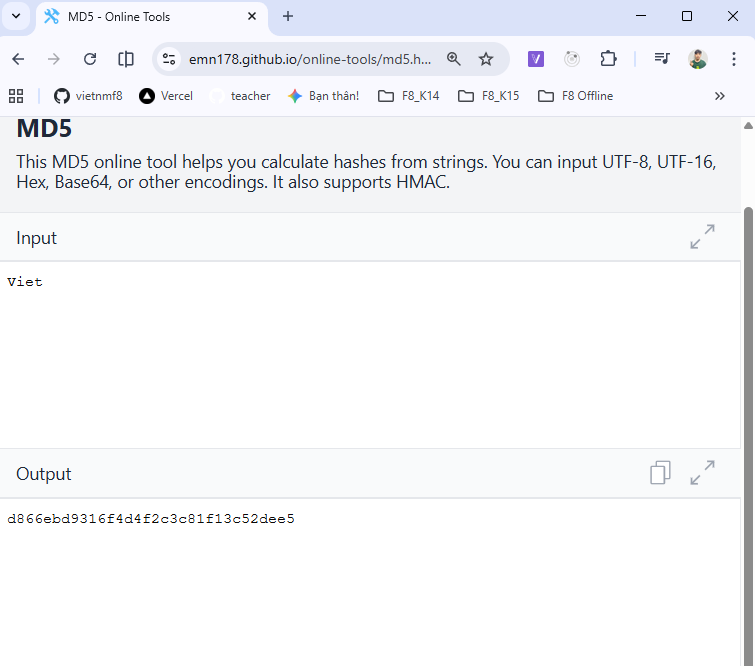

In [ ]:
- Tức là không thể dựa từ mã `d866ebd9316f4d4f2c3c81f13c52dee5` và giải mã trở về `Viet` được
- Nhưng những thuật toán mã hoá một chiều như `Sha1`, `Md5` mặc dù không thể giải mã ngược nhưng bảo mật không tốt. Hacker có thể chạy tool để sinh ra đa dạng các ký tự đầu vào --> rồi nhấn Hash để sinh ra ký tự đầu ra, rồi nó lưu vào DB của nó. VD:
origin: `123456` | hash: `e10adc3949ba59abbe56e057f20f883e`

- Hacker sẽ chạy tool để lưu hết những tham chiếu này (mục tiêu để nó nhận biết là: "à, cứ `123456` sẽ là `e10adc3949ba59abbe56e057f20f883e`")
- Trong tương lai thì nó có thể suy ngược từ `e10adc3949ba59abbe56e057f20f883e` thành `123456`

---
Tức là nó không thể giải mã bằng thuật toán được. Mà nó có thể lưu trữ bằng cách tự hash ra thành nhiều cái, rồi từ cái hash lại suy ngược lại mật khẩu gốc!!


- Sha1 Decrypt
- 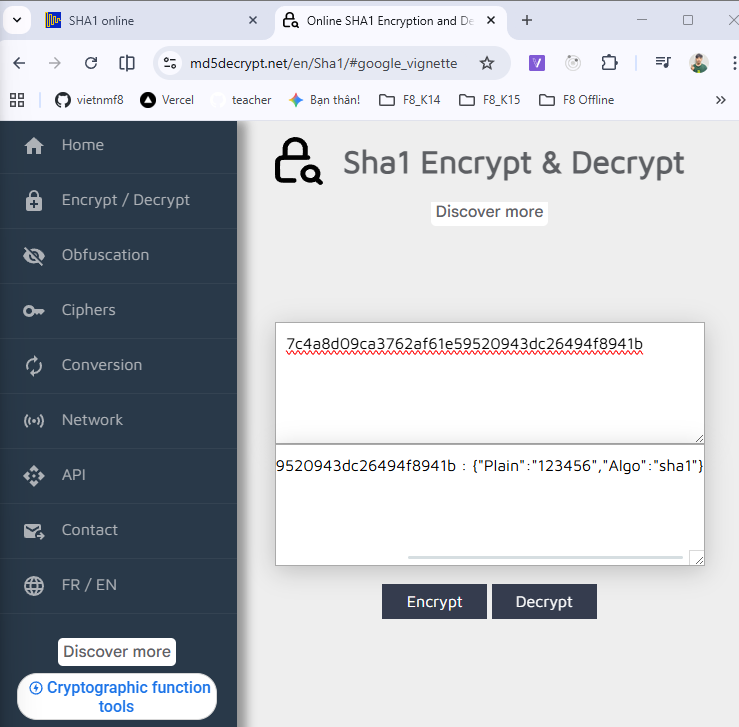

In [ ]:
Vì nó lưu cả một bộ sưu tập các ký tự mã hoá rồi
- Vậy nên mặc dù dùng mã hoá một chiều của `md5` hoặc `sha1`, thì độ rủi ro là cũng có
- Các thuật toán mã hoá một chiều thường để mã hoá mật khẩu của người dùng. Nghĩa là giả sử người dùng ĐĂNG KÝ đặt mật khẩu là 123456. Chúng ta dùng `md5` để mã hoá thành `e10adc3949ba59abbe56e057f20f883e`. Sau đó chúng ta lưu vào trong DB, vào trường password

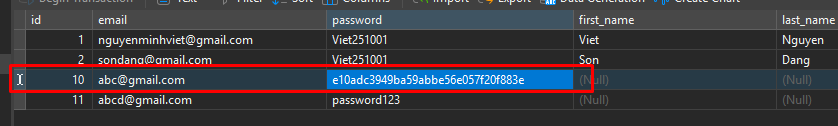

In [ ]:
- Đến khi người dùng ĐĂNG NHẬP, chúng ta lại lấy mật khẩu người dùng nhập, rồi chúng ta lại sử dụng `md5` hoặc `sha1` để mã hoá -> sinh ra chuỗi mã hoá. 
- Chúng ta dùng chuỗi này để so sánh với chuỗi trong DB đã lưu khi người dùng đăng ký.
- Nguyên tắc kiểu là: Nếu cùng đầu vào thì sẽ cùng đầu ra (Không đảm bảo tuyệt đối 100% nhưng gần như không bao giờ rơi vào trường hợp là với 2 chuỗi đầu vào nhưng lại cho ra 1 đầu ra)
- Thì người ta mã hoá bằng md5 hoặc sha1 để mã hoá mật khẩu với mục đích là BẢO MẬT. Nghĩa là khi mã hoá một chiều, không may chúng ta bị hack database. Hacker sẽ mở bảng user ra sẽ thấy những cái chuỗi mã hoá kiểu như này `e10adc3949ba59abbe56e057f20f883e`. Thì nó sẽ không thể biết mật khẩu gốc của người dùng là gì để mà nó đăng nhập.
> Nhưng một khi đã HACK được DB rồi việc đăng nhập hay không thì lại không cần thiết lắm. 
> Nhưng ít nhất là không lộ mật khẩu người dùng. Vì người dùng đôi khi có thói quen đặt 1 mật khẩu giống nhau cho nhiều tài khoản (Mạng xã hội, tài khoản ngân hàng). Nó biết sẽ dùng chính email và mật khẩu này để thử đi đăng nhập vào những trang mạng xã hôi, tài khoản ngân hàng. Vậy việc mã hoá mật khẩu là đảm bảo bảo mật cho chính người dùng nếu không may bị hack DB
> Nhưng thằng MD5 cũng đâu an toàn, nó có cả bộ sưu tập, nó cầm `e10adc3949ba59abbe56e057f20f883e` giải mã được ngay


In [ ]:
# Giải pháp
- Ngày nay có những thuật toán băm: Tại 1 thời điểm, cùng một đầu vào nhưng lại cho ra nhiều đầu ra khác nhau tại những thời điểm khác nhau
`https://bcrypt-generator.com/`
`npm install bcrypt`

Hash lần 1:
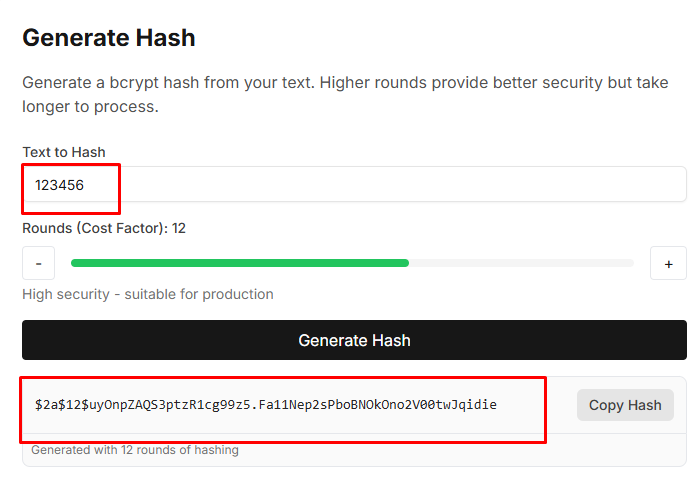

Hash lần 2:
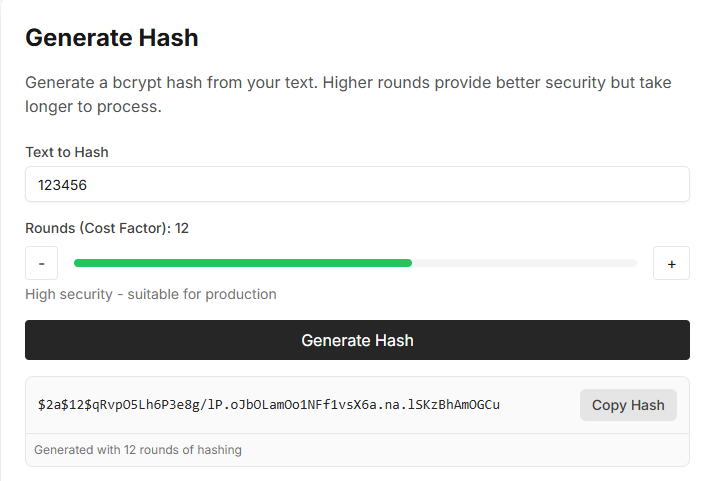

> Rõ ràng ở 2 thời điểm, cùng 1 đầu vào nhưng lại cho ra 2 đầu ra khác nhau
> Kết luận: Cùng một mật khẩu 123, khi nhấn Hash sẽ ra được những chuỗi mà không trùng nhau

VD: 
- Thời điểm người dùng đăng ký mật khẩu `123`
	+ hash: `$2a$12$qRvpO5Lh6P3e8g/lP.oJbOLamOo1NFf1vsX6a.na.lSKzBhAmOGCu`
	+ Chúng ta sẽ lưu vào DB
- Đến khi Hacker chạy tool, nó cũng sẽ dò rất nhiều giá trị Input, sau đó nó Hash ra. Nhưng lúc này sẽ hash ra một chuỗi khác, khác với chuỗi ban đầu được hash bằng `123`
> Thế nên nó không thể tạo được bộ sưu tập để nó dò ra được password